In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns

## EDA

In [2]:
df = pd.read_csv('../Data/our_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           3504 non-null   object 
 1   production_date       3504 non-null   object 
 2   genres                3504 non-null   object 
 3   runtime_minutes       3504 non-null   float64
 4   director_name         3504 non-null   object 
 5   director_professions  3504 non-null   object 
 6   director_birthYear    3504 non-null   object 
 7   director_deathYear    3504 non-null   object 
 8   movie_averageRating   3504 non-null   float64
 9   movie_numerOfVotes    3504 non-null   float64
 10  approval_Index        3504 non-null   float64
 11  Production budget $   3504 non-null   int64  
 12  Domestic gross $      3504 non-null   int64  
 13  Worldwide gross $     3504 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 383.4+ KB


In [4]:
df.shape

(3504, 14)

### Opisy kolumn:
- Movie_title
- Production_date
- Genres
- Runtime_minutes
- Director_name (primaryName)
- Director_professions (primaryProfession)
- Director_birthYear
- Director_deathYear
- Movie_averageRating : refers to the average rating given by online users for particular movie
- Movie_numberOfVotes : refers to the number of votes given by online users for a particular movie
- Approval_Index :is a normalized indicator (on scale 0-10) calculated by multiplying the logarithm of the number of votes by the average users rating. It provides a concise measure of a movie's overall popularity and approval among online viewers, penalizing both films that got too few reviews and blockbusters that got too many.
- Production_budget ( $)
- Domestic_gross ($)
- Worldwide_gross ($)

In [5]:
df.head(20)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307
5,Melancholia,2011-11-11,"Drama,Sci-Fi",135.0,Lars von Trier,"writer,director,producer",1956,alive,7.1,185676.0,6.205598,9400000,3030848,21817298
6,The Kite Runner,2007-12-14,Drama,128.0,Marc Forster,"producer,director,writer",1969,alive,7.6,80886.0,6.187246,20000000,15800078,74180745
7,Noah,2014-03-27,"Action,Adventure,Drama",138.0,Darren Aronofsky,"producer,writer,director",1969,alive,5.8,257429.0,5.184656,130000000,101200044,352831065
8,Overboard,2018-05-04,"Comedy,Romance",112.0,Rob Greenberg,"producer,director,writer",\N,alive,6.0,39291.0,4.538167,12000000,50316123,91244913
9,The Girl Next Door,2004-04-09,"Comedy,Drama,Romance",109.0,Luke Greenfield,"director,producer,writer",1972,alive,6.7,227685.0,5.949102,25000000,14589444,31635150


### POMYSŁ:
- user podaje jakiś film dostępny w ramce danych
- model wyrzuca mu jakieś 3-5 rekomendowanych filmów z ramki
- będą klastry wtedy i ma to potencjał
- ten sam film może być polecany przez to, że jest w nim kilka różnych gatunków = utworzyłbym wiersze z nowymi obserwacjami:
ten sam film będzie miał kilka wierszy ze względu na gatunek, ryzyko: model będzie miał fałszywe dane, ale jest max po 3 gatunki na film i wiekszosc paradoksalnie ma po 3, więc będzie w miare równo
- dla mnie szczegółowe info o reżyserze jest skipowalne
- ważne kolumny: tytuł, data (rozdzieliłem już, najprawdopodobnij trzeba by zawezic do pólrocza kiedy film powstał), gatunek, runtime, reżyser (o ile jest, jak nie to other), ocena
- idk: budzety, któe brać itd, które indexy do oceny, ilość votów


In [6]:
# rozdzielmy gatunki
df = df.drop('genres', axis=1).join(df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [13]:
# sprawdzmy po ile mamy filmów z 1,2,3 gatunkami:
genres_per_film = df["movie_title"].value_counts()
for wystapienie in range(1,10):
    print(f"wystepujace {wystapienie}: ", (genres_per_film == wystapienie).sum())

wystepujace 1:  285
wystepujace 2:  810
wystepujace 3:  2240
wystepujace 4:  24
wystepujace 5:  16
wystepujace 6:  34
wystepujace 7:  3
wystepujace 8:  0
wystepujace 9:  1


In [14]:
df["production_year"]=df["production_date"].str.split("-")\
                               .str[0]\
                               .str.strip()
df["production_month"]=df["production_date"].str.split("-")\
                               .str[1]\
                               .str.strip()
df["production_day"]=df["production_date"].str.split("-")\
                               .str[2]\
                               .str.strip()
df = df.drop('production_date', axis= 1)

In [15]:
df.duplicated().sum()

0

In [16]:
df['genres'].value_counts()

Drama          1784
Comedy         1347
Action          946
Adventure       743
Crime           629
Romance         596
Thriller        530
Horror          366
Mystery         323
Sci-Fi          296
Biography       274
Fantasy         266
Family          216
Animation       191
Music           121
History         121
Sport            90
War              65
Documentary      49
Musical          41
Western          34
Film-Noir         6
News              1
Name: genres, dtype: int64

In [17]:
#PODZIAŁ NA KOLUMNY Z DANYMI KATEGORYCZNYMI I NUMERYCZNYMI
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(exclude=['object']).columns

print(cat_columns)
print(num_columns)

Index(['movie_title', 'director_name', 'director_professions',
       'director_birthYear', 'director_deathYear', 'genres', 'production_year',
       'production_month', 'production_day'],
      dtype='object')
Index(['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')


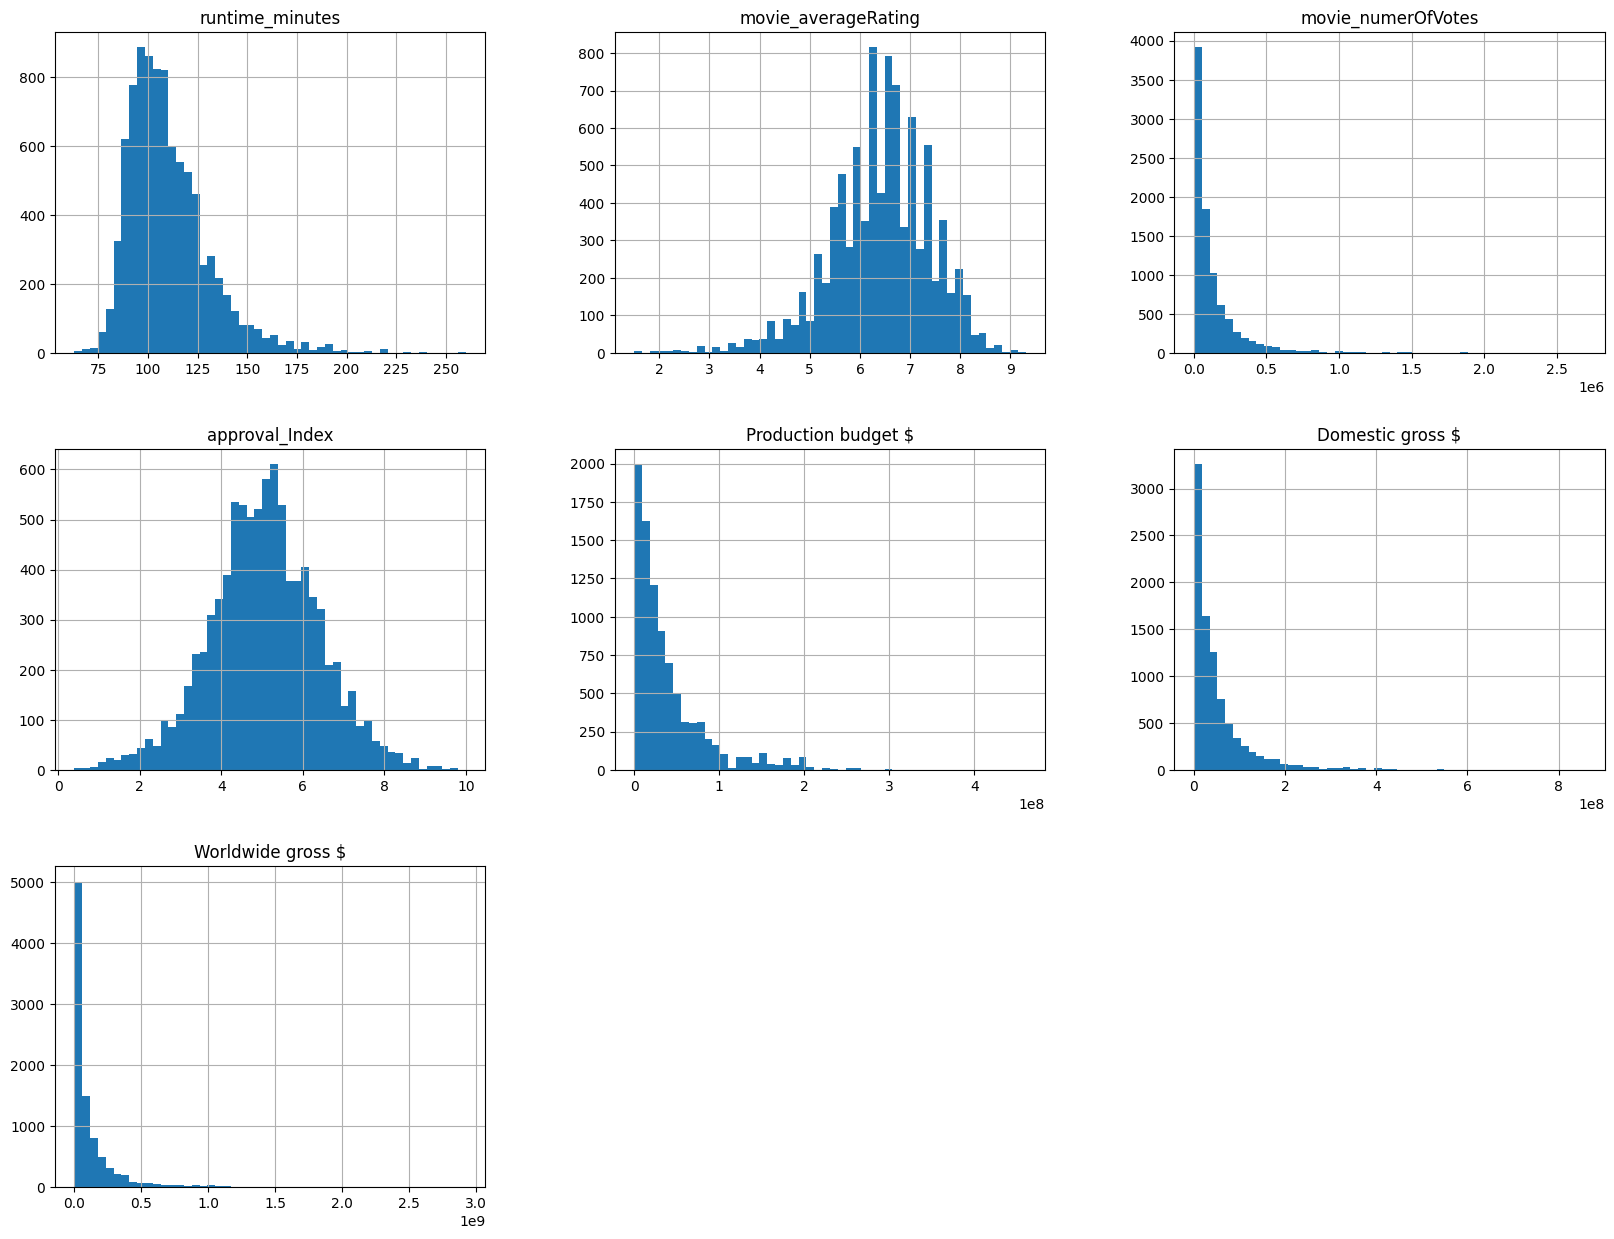

In [18]:
df.describe()

#DLA DANYCH NUMERYCZNYCH ZBADAĆ ICH ROZKŁAD
df[num_columns].hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Darek\AppData\Local\Temp\ipykernel_10160\3386494069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


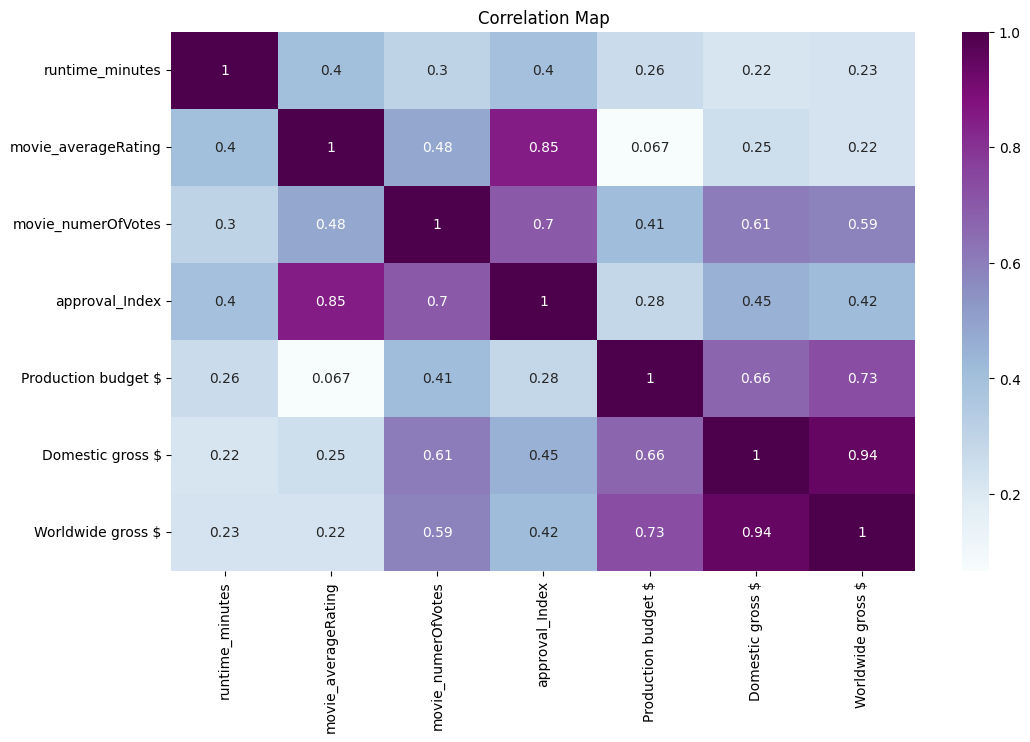

In [19]:
correlation=df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation, cmap="BuPu", annot= True)
plt.title("Correlation Map")
plt.show()